In [729]:
# usamos libreria de Algebra Linear
using LinearAlgebra
using Logging
using Plots

# modulos incluidos
include("module_JaynesCummings.jl")

population_probability (generic function with 1 method)

In [730]:
@debug "Verbose debugging information.  Invisible by default"
@info  "An informational message"
@warn  "Something was odd.  You should pay attention"
@error "A non fatal error occurred"

┌ Info: An informational message
└ @ Main /home/mendez/github_repositories/my_repositories/quantum_optics/JaynesCummings_model_v2.ipynb:2
┌ Warning: Something was odd.  You should pay attention
└ @ Main /home/mendez/github_repositories/my_repositories/quantum_optics/JaynesCummings_model_v2.ipynb:3
┌ Error: A non fatal error occurred
└ @ Main /home/mendez/github_repositories/my_repositories/quantum_optics/JaynesCummings_model_v2.ipynb:4


In [731]:
# Definimos frecuencias caracteristicas 
ω0 = Float64(100.0); println("ω0 = ",ω0);
g = Float64(abs(ω0/100.0)); println("g = ω0/100 = ",g);
m = 10; println("n = ",m);
println("ħ=1")

ω0 = 100.0
g = ω0/100 = 1.0
n = 10
ħ=1


Expresamos $\hat{H}$ en la base $\mathcal{B}=\left\{ \ket{g,(n+1)},\ket{e,n} \right\}$ y mostramos su representación matricial en pantalla

In [732]:
H=create_2x2_hamiltonian(ω0*(m+1),g*sqrt(m+1));
@show H

# calculamos las autoenergías (autovalores) y autoestados (autovectores) del hamiltoniano
eigenvalues_problem(H,H_eigenvals,H_eigenvectors);

H = [7.0710678118654755 3.3166247903554; 3.3166247903554 7.0710678118654755]


Hacemos el siguiente cambio de variable $\ket{g,(n+1)}\equiv\ket{\phi_0};\ket{e,n}\equiv\ket{\phi_1}$

In [733]:
# definimos el estado inicial (fundamental), estado auxiliar y estado excitado
ϕ0=[Float64(1),Float64(0)]; # vector columna (nivel fundamental del átomo y (n+1) fotones excitados)
ϕ1=[Float64(0),Float64(1)]; # vector columna (nivel excitado del átomo y (n) fotones excitadoso)

# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=1.0;n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

In [734]:
ψ_t=evolution(ϕ0,H_eigenvals,H_eigenvectors,time_vector) # con estado inicial |ψ0⟩=|g⟩

2×1000 Matrix{ComplexF64}:
 -0.5+0.0im  -0.499996+0.0018791im   …   0.409006-0.287601im
  0.5-0.0im   0.499973-0.00519895im     -0.285565+0.41043im

Calculamos probabilidades de población del estado excitado y fundamental, respectivamente

In [735]:
pϕ0=population_probability(time_vector,H_eigenvectors,ψ_t,ϕ0,1.0);
pϕ1=population_probability(time_vector,H_eigenvectors,ψ_t,ϕ1,1.0);


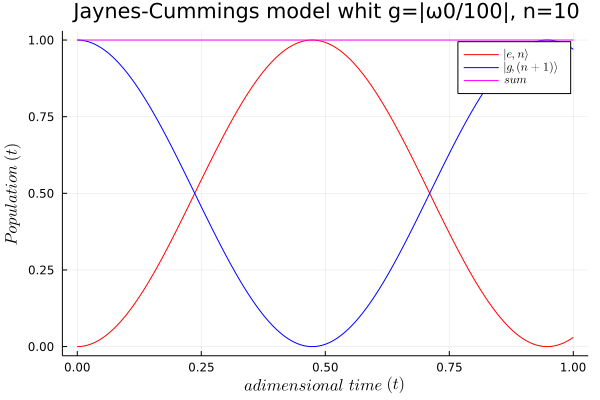

In [736]:
plt = plot()
plot!(plt, time_vector, pϕ1, color = :red, label = "\$|e,n⟩\$")
plot!(plt, time_vector, pϕ0, color = :blue, label = "\$|g,(n+1)⟩\$")
plot!(plt, time_vector, (pϕ1+pϕ0), color = :magenta, label = "\$sum\$")
plot!(ylabel = "\$Population\$ \$(t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(title = "Jaynes-Cummings model whit g=|ω0/100|, n=$(m)")
plot!(plt, legend = :topright)

In [737]:
info_pϕ1=period_oscillator(time_vector,real(pϕ1),1e-6);
println("Ω=",info_pϕ1[1],"\nT=",info_pϕ1[2]);

Ω=13.2704061773201
T=0.9469469469469469


### Resolvemos la evolución para un estado coherente

Partimos de un estado coherente arbitrario dado por $\ket{\chi,\alpha}$ y lo expresamos como combinación lineal de los autoestados del hamiltoniano $ \left\{ \ket{\phi_i} \right\}$ y los estados de Fock $\left\{\ket{n}\right\}$
\begin{align}
    \ket{\chi,\alpha}\equiv \ket{\chi} \otimes \ket{\alpha}
    \Rightarrow \ket{\chi,\alpha}=\left( \sum_{i=1}^{n_i}c_{i}^{\chi}\ket{\phi_i} \right) \otimes
        \left( \sum_{i=1}^{n_j}c_{j}^{\alpha}\ket{n_j}  \right)
\end{align}

Y ahora, recordando que los estados coherentes se descomonen en los estados de Fock de la siguiente manera
\begin{equation}
    \ket{\alpha}=\sum_{n=0}^{\infty}\frac{\alpha^n}{\sqrt{n!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{n}
\end{equation}

Entonces, como los únicos estados de Fock acoplados por los subespacios invariantes son $\left\{\ket{n};\ket{n+1}\right\}$ tendremos que los estados $\ket{\alpha}$ se podrán escribir como
\begin{align}
    \ket{\alpha_n}=\frac{\alpha^n}{\sqrt{n!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{n}+\frac{\alpha^{(n+1)}}{\sqrt{(n+1)!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{(n+1)}\\
    \Rightarrow \ket{\alpha_n}=\frac{\alpha^n}{\sqrt{n!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\left[ \ket{n} + \frac{\alpha}{\sqrt{(n+1)}}\ket{(n+1)} \right];\ket{\alpha}=\sum_{n=0}^{\infty}\ket{\alpha_n}
\end{align}

Finalmente, particularizando al problema que estamos tratando cada subespacio (sub-bloque diagonal) es de dimensión 2 y dentro de cada uno tendremos las siguientes relaciones,

\begin{align}
    \ket{\chi,\alpha}_n=\left( c_{1}^{\chi}\ket{\phi_1}+c_{2}^{\chi}\ket{\phi_2} \right) \otimes
    \left(  c_1^{\alpha}\ket{n} + c_2^{\alpha}\ket{(n+1)}  \right) \\
    \Rightarrow \ket{\chi,\alpha}_n=c_{1}^{\chi}c_1^{\alpha}\ket{\phi_1,n}+
    c_{1}^{\chi}c_2^{\alpha}\ket{\phi_1,(n+1)}+
    c_{2}^{\chi}c_1^{\alpha}\ket{\phi_2,n}+
    c_{2}^{\chi}c_2^{\alpha}\ket{\phi_2,(n+1)}
\end{align}

Y evolucionando los autoestados de los sub-hamiltonianos (sub-bloques diagonales) trivialmente según la ec. de Schrödinger tendremos

\begin{align}
    \Rightarrow \ket{\chi,\alpha}_n(t)=
    c_{1}^{\chi}c_1^{\alpha}\ket{\phi_1(t),n}+
    c_{1}^{\chi}c_2^{\alpha}\ket{\phi_1(t),(n+1)}+
    c_{2}^{\chi}c_1^{\alpha}\ket{\phi_2(t),n}+
    c_{2}^{\chi}c_2^{\alpha}\ket{\phi_2(t),(n+1)}\\

    \Rightarrow \ket{\chi,\alpha}_n(t)=
    c_{1}^{\chi}\exp\left(\frac{-i\epsilon_1t}{\hbar}\right)
        \left\{
            c_1^{\alpha}\ket{\phi_1,n}+c_2^{\alpha}\ket{\phi_1,(n+1)}
        \right\}+
    c_{2}^{\chi}\exp\left(\frac{-i\epsilon_2t}{\hbar}\right)
        \left\{
            c_1^{\alpha}\ket{\phi_2,n}+
            c_2^{\alpha}\ket{\phi_2,(n+1)}
        \right\}
\end{align}


In [738]:
# Definimos frecuencias caracteristicas 
ω0 = Float64(100.0); println("ω0 = ",ω0);
g = Float64(abs(ω0/100.0)); println("g = ω0/100 = ",g);
m = 10; println("n = ",m);
println("ħ = 1")

ω0 = 100.0
g = ω0/100 = 1.0
n = 10
ħ = 1


In [739]:
# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=10.0;n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

In [740]:
# Definimos primer y segundo sub-bloque a diagonalizar
H1=create_2x2_hamiltonian(ω0*(m+1),g*sqrt(m+1));
H12=create_2x2_hamiltonian(ω0*(m+2),g*sqrt(m+2));

# calculamos las autoenergías (autovalores) y autoestados (autovectores) del hamiltoniano
eigenvalues_problem(H1,H1_eigenvals,H1_eigenvectors);
eigenvalues_problem(H2,H2_eigenvals,H2_eigenvectors);

Definimos parámetros que caracterizan al estado coherente

In [741]:
α=sqrt(10);
αcoeff1=((α^m)*exp(-0.5*(abs(α)^2)))/sqrt(factorial(m));αcoeff2=αcoeff1*(α/sqrt(m+1));
α_params=(αcoeff1,αcoeff2); # Tupla de parámetros

Realizamos evolución del los sub-bloques

In [742]:
ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

2×1000 Matrix{ComplexF64}:
 -0.168624+0.0im  -0.140207-0.0936805im  …  0.0956798+0.138851im
  0.168624-0.0im   0.146362+0.0837396im     -0.117428-0.121015im

Calculamos probabildiades de población

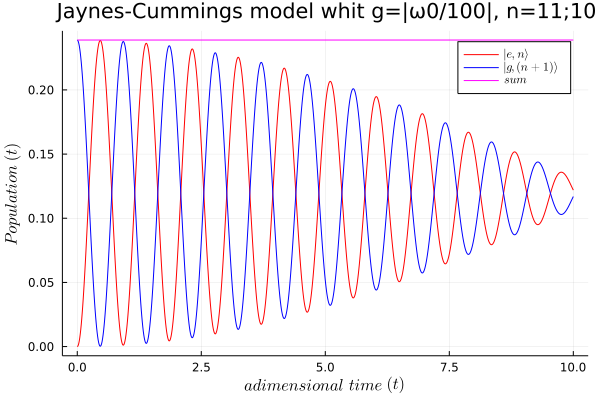

In [743]:
pϕ0_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ0,α_params[1]);
pϕ1_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);

pϕ0_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ0,α_params[2]);
pϕ1_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

plt = plot()
plot!(plt, time_vector, (pϕ1_1+pϕ1_2), color = :red, label = "\$|e,n⟩\$")
plot!(plt, time_vector, (pϕ0_1+pϕ0_2), color = :blue, label = "\$|g,(n+1)⟩\$")
plot!(plt, time_vector, (pϕ1_1+pϕ0_1+pϕ1_2+pϕ0_2), color = :magenta, label = "\$sum\$")
plot!(ylabel = "\$Population\$ \$(t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(title = "Jaynes-Cummings model whit g=|ω0/100|, n=$(m+1);$(m)")
plot!(plt, legend = :topright)

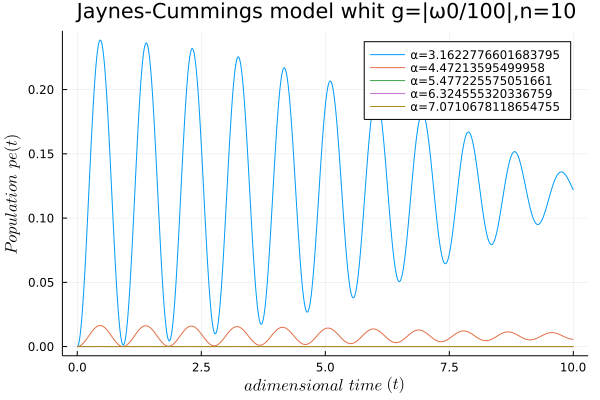

In [744]:
α=sqrt(10);
αcoeff1=((α^m)*exp(-0.5*(abs(α)^2)))/sqrt(factorial(m));αcoeff2=αcoeff1*(α/sqrt(m+1));
α_params=(αcoeff1,αcoeff2); # Tupla de parámetros

ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

pϕ1_1_10=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);
pϕ1_2_10=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

plt=plot()
plot!(title = "Jaynes-Cummings model whit g=|ω0/100|,n=$(m)")
plot!(ylabel = "\$Population\$ \$pe(t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(plt, legend = :topright)
plot!(plt,time_vector,(pϕ1_1_10+pϕ1_2_10),label="α=$(α)")

####################################################################################################################

α=sqrt(20);
αcoeff1=((α^m)*exp(-0.5*(abs(α)^2)))/sqrt(factorial(m));αcoeff2=αcoeff1*(α/sqrt(m+1));
α_params=(αcoeff1,αcoeff2); # Tupla de parámetros

ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

pϕ1_1_20=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);
pϕ1_2_20=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

plot!(plt,time_vector,(pϕ1_1_20+pϕ1_2_20),label="α=$(α)")

####################################################################################################################

α=sqrt(30);
αcoeff1=((α^m)*exp(-0.5*(abs(α)^2)))/sqrt(factorial(m));αcoeff2=αcoeff1*(α/sqrt(m+1));
α_params=(αcoeff1,αcoeff2); # Tupla de parámetros

ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

pϕ1_1_30=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);
pϕ1_2_30=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

plot!(plt,time_vector,(pϕ1_1_30+pϕ1_2_30),label="α=$(α)")

####################################################################################################################

α=sqrt(40);
αcoeff1=((α^m)*exp(-0.5*(abs(α)^2)))/sqrt(factorial(m));αcoeff2=αcoeff1*(α/sqrt(m+1));
α_params=(αcoeff1,αcoeff2); # Tupla de parámetros

ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

pϕ1_1_40=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);
pϕ1_2_40=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

plot!(plt,time_vector,(pϕ1_1_40+pϕ1_2_40),label="α=$(α)")

####################################################################################################################

α=sqrt(50);
αcoeff1=((α^m)*exp(-0.5*(abs(α)^2)))/sqrt(factorial(m));αcoeff2=αcoeff1*(α/sqrt(m+1));
α_params=(αcoeff1,αcoeff2); # Tupla de parámetros

ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

pϕ1_1_50=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);
pϕ1_2_50=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

plot!(plt,time_vector,(pϕ1_1_50+pϕ1_2_50),label="α=$(α)")